<a href="https://colab.research.google.com/github/SaashaJoshi/Pancreas-Cancer/blob/master/vgg_unet_keras_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-b8b1n14b
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-b8b1n14b
     |████████████████████████████████| 3.3MB 9.4MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=30454 sha256=90b96cfa5dd3c86edae094ea13c19e1f0a6c69a520329c4852004a3c10dab8e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-fbol3nm2/wheels/a8/be/2c/1e1f0a75330e3ae33dd34c2ba085929eb7c7ae1d2184f4b7b5
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [0]:
# pip install tensorflow==1.14
pip install tensorflow-gpu==1.14

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from glob import glob

data_path = 'drive/My Drive/segment_data/train_img'
output_path = working_path = 'drive/My Drive/segment_data'
g = glob(data_path + '/*.png')

print ("Total of %d images.\nFirst 5 filenames:" % len(g))
print ('\n'.join(g[:5]))

Total of 351 images.
First 5 filenames:
drive/My Drive/segment_data/train_img/12139.png
drive/My Drive/segment_data/train_img/12131.png
drive/My Drive/segment_data/train_img/12119.png
drive/My Drive/segment_data/train_img/12155.png
drive/My Drive/segment_data/train_img/12154.png


In [0]:
%tensorflow_version 1.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14.0

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0


In [0]:
from PIL import Image
import os
import tensorflow as tf
import numpy as np
from matplotlib.pyplot import imshow

In [0]:
# name = "image"
# path = os.curdir + "/datasetfinal/"+ name

test_dir = 'drive/My Drive/segment_data/test_img'
train_dir = 'drive/My Drive/segment_data/train_img'
train_masks_dir = 'drive/My Drive/segment_data/train_msk'
new_train_mask = 'drive/My Drive/segment/train_msk'
new_train_img = 'drive/My Drive/segment/train_img'

# dirs = os.listdir(test_dir)
# for f in dirs:
#     fullpath = os.path.join(test_dir,f) 
#     if os.path.isfile(fullpath):
#         img=Image.open(fullpath)
#         pixels = img.load()
#         # pix_val = list(img.getdata())
#         # print(pix_val)
#         img = img.convert('L')
#         # imshow(img)
#         # print(img.size)
#         # img.point(lambda x: x * 1/255)
#         # new_test_images = 'drive/My Drive/pancreas_data/new_test_images'
#         # new_path = os.path.join(new_test_images, f)
#         # img.save(new_path)
#         for i in range(img.size[0]): # for every pixel:
#             for j in range(img.size[1]):
#                 if pixels[i,j] != 0:
#                     img.putpixel((i,j),1)
#         img.save(fullpath)


dirs = os.listdir(train_dir)

for f in dirs:
  newpath = os.path.join(new_train_img,f) 
  fullpath = os.path.join(train_dir,f) 
  if os.path.isfile(fullpath):
      img=Image.open(fullpath)
      pixels = img.load()
      img = img.convert('L')
      for i in range(img.size[0]): # for every pixel:
          for j in range(img.size[1]):
              if pixels[i,j] != 0:
                  img.putpixel((i,j),1)
      img.save(newpath)

dirs = os.listdir(train_masks_dir)


for f in dirs:
  newpath = os.path.join(new_train_mask,f) 
  fullpath = os.path.join(train_masks_dir,f) 
  if os.path.isfile(fullpath):
      img=Image.open(fullpath)
      # imshow(img)
      pixels = img.load()
      # print(img.size)
      # print(img.load())
      img = img.convert('L')
      # print(img.size)
      for i in range(img.size[0]): # for every pixel:
          for j in range(img.size[1]):
              if pixels[i,j] != 0:
                  img.putpixel((i,j),1)
      img.save(newpath)

In [0]:
# from keras_segmentation.models.fcn import fcn_32

# model = fcn_32(n_classes=2,  input_height=512, input_width=512)

# model.train(
#     train_images="pancreas_data/train_images",
#     train_annotations="pancreas_data/train_masks",
#     checkpoints_path="tmp/fcn_32", epochs=10, auto_resume_checkpoint=True
# )

In [0]:
# %tensorflow_version 1.x
!pip install tensorflow==1.14
!pip install tensorflow-gpu==1.14

In [0]:
pip install tensorflow-gpu== 1.14.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu== (from versions: 0.12.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.3.0, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.9.0, 1.10.0, 1.10.1, 1.11.0, 1.12.0, 1.12.2, 1.12.3, 1.13.1, 1.13.2, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0)
ERROR: No matching distribution found for tensorflow-gpu==


In [0]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=2,  input_height=512, input_width=512)

model.train(
    train_images="drive/My Drive/segment/train_img",
    train_annotations="drive/My Drive/segment/train_msk",
    checkpoints_path="/tmp/vgg_unet_1", epochs=5, auto_resume_checkpoint=True
)

Using TensorFlow backend.


58892288/58889256 [==============================] - 2s 0us/step
Verifying training dataset


100%|██████████| 351/351 [07:10<00:00,  1.23s/it]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 152s 296ms/step - loss: 0.1029 - accuracy: 0.9902
saved  /tmp/vgg_unet_1.0
Epoch 2/5
512/512 [==============================] - 135s 264ms/step - loss: 0.0850 - accuracy: 0.9924
saved  /tmp/vgg_unet_1.1
Epoch 3/5
512/512 [==============================] - 136s 265ms/step - loss: 0.0847 - accuracy: 0.9924
saved  /tmp/vgg_unet_1.2
Epoch 4/5
512/512 [==============================] - 135s 265ms/step - loss: 0.0848 - accuracy: 0.9924
saved  /tmp/vgg_unet_1.3
Epoch 5/5
512/512 [==============================] - 136s 265ms/step - loss: 0.0847 - accuracy: 0.9924
saved  /tmp/vgg_unet_1.4


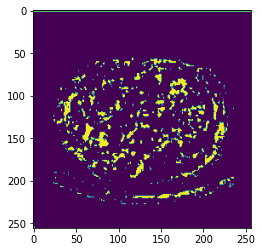

In [0]:
out = model.predict_segmentation(
    inp="drive/My Drive/segment/test_img/000157.png",
    out_fname="drive/My Drive/segment/test_outputs/00157.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)
plt.show()


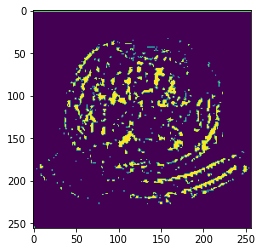

In [0]:
# out = model.predict_segmentation(
#     inp="drive/My Drive/segment_data/train_img/12133.png",
#     out_fname="drive/My Drive/segment/test_outputs/12133.png"
# )

# import matplotlib.pyplot as plt
# plt.imshow(out)
# plt.show()

In [0]:
# evaluating the model

model.predict_multiple(inp_dir="drive/My Drive/segment/test_img",
                       out_dir="drive/My Drive/segment/test_outputs", checkpoints_path="tmp/vgg_unet_1")

print(model.evaluate_segmentation(checkpoints_path="/tmp/vgg_unet_1", inp_images_dir="drive/My Drive/segment/test_img" , annotations_dir="drive/My Drive/segment/test_msk"))

100%|██████████| 1/1 [00:00<00:00, 10.47it/s]
1it [00:00,  1.32it/s]

{'frequency_weighted_IU': 0.9298248291015625, 'mean_IU': 0.46491241455078125, 'class_wise_IU': array([0.92982483, 0.        ])}
